In [1]:
#April 2, 2020
#Sets up the data directory and links code to it, downloads getdata.py 
import os
import sys
data_folder = os.path.join(os.path.expanduser("~"), "OneDrive", "Desktop", "Data Mining", "Chapter9HW", "Data", "books")

In [2]:
#Preprocesses as files are loaded so that the data is always replicable if the data source stays the same
#Removes the Disclaimer/ Prelude from Project Gutenberg, Demarks where it begins/ ends
def clean_book(document):
    lines = document.split("\n")
    start= 0
    end = len(lines)
    for i in range(len(lines)):
        line = lines[i]
        if line.startswith("*** START OF THE PROJECT GUTENBERG"):
            start = i + 1
        elif line.startswith("*** END OF THE PROJECT GUTENBERG"):
            end = i - 1
    return "\n".join(lines[start:end])

In [3]:
#Gets the documents and classes 
#Loops through the folder, loads test document and records number assigned to author as a target class
import numpy as np

def load_books_data(folder=data_folder):
    documents = []
    authors = []
    subfolders = [subfolder for subfolder in os.listdir(folder)
                  if os.path.isdir(os.path.join(folder, subfolder))]
    for author_number, subfolder in enumerate(subfolders):
        full_subfolder_path = os.path.join(folder, subfolder)
        for document_name in os.listdir(full_subfolder_path):
            with open(os.path.join(full_subfolder_path, document_name)) as inf:
                documents.append(clean_book(inf.read()))
                authors.append(author_number)
    return documents, np.array(authors, dtype='int')

In [4]:
#Call function to load the books
documents, classes = load_books_data(data_folder)

In [5]:
#Call matplotlib to set up histogram/ inline graph
%matplotlib inline

In [6]:
#Extract lengths of document into a list, consistent lengths usually easier to learn than different, here there is variance
document_lengths = [len(document) for document in documents]

C:\Users\JRuiz\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\JRuiz\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\JRuiz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


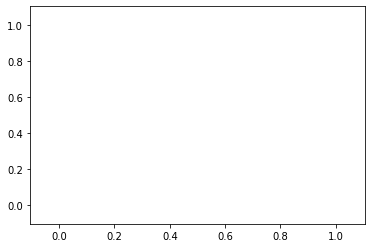

In [7]:
#Plot the document lengths using matplotlib's histogram function and seaborn with nicer quality graphs
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(document_lengths)
plt.savefig("hist.png")

In [8]:
#Contains the function words which have little meaning alone but words that are used to form English sentences
#More frequent words means better authorship analysis, less frequent words means better for context based data mining
#Sets up vocabulary list
function_words = ["a", "able", "aboard", "about", "above", "absent",
                  "according" , "accordingly", "across", "after", "against",
                  "ahead", "albeit", "all", "along", "alongside", "although",
                  "am", "amid", "amidst", "among", "amongst", "amount", "an",
                    "and", "another", "anti", "any", "anybody", "anyone",
                    "anything", "are", "around", "as", "aside", "astraddle",
                    "astride", "at", "away", "bar", "barring", "be", "because",
                    "been", "before", "behind", "being", "below", "beneath",
                    "beside", "besides", "better", "between", "beyond", "bit",
                    "both", "but", "by", "can", "certain", "circa", "close",
                    "concerning", "consequently", "considering", "could",
                    "couple", "dare", "deal", "despite", "down", "due", "during",
                    "each", "eight", "eighth", "either", "enough", "every",
                    "everybody", "everyone", "everything", "except", "excepting",
                    "excluding", "failing", "few", "fewer", "fifth", "first",
                    "five", "following", "for", "four", "fourth", "from", "front",
                    "given", "good", "great", "had", "half", "have", "he",
                    "heaps", "hence", "her", "hers", "herself", "him", "himself",
                    "his", "however", "i", "if", "in", "including", "inside",
                    "instead", "into", "is", "it", "its", "itself", "keeping",
                    "lack", "less", "like", "little", "loads", "lots", "majority",
                    "many", "masses", "may", "me", "might", "mine", "minority",
                    "minus", "more", "most", "much", "must", "my", "myself",
                    "near", "need", "neither", "nevertheless", "next", "nine",
                    "ninth", "no", "nobody", "none", "nor", "nothing",
                    "notwithstanding", "number", "numbers", "of", "off", "on",
                    "once", "one", "onto", "opposite", "or", "other", "ought",
                    "our", "ours", "ourselves", "out", "outside", "over", "part",
                    "past", "pending", "per", "pertaining", "place", "plenty",
                    "plethora", "plus", "quantities", "quantity", "quarter",
                    "regarding", "remainder", "respecting", "rest", "round",
                    "save", "saving", "second", "seven", "seventh", "several",
                    "shall", "she", "should", "similar", "since", "six", "sixth",
                    "so", "some", "somebody", "someone", "something", "spite",
                    "such", "ten", "tenth", "than", "thanks", "that", "the",
                    "their", "theirs", "them", "themselves", "then", "thence",
                  "therefore", "these", "they", "third", "this", "those",
"though", "three", "through", "throughout", "thru", "thus",
"till", "time", "to", "tons", "top", "toward", "towards",
"two", "under", "underneath", "unless", "unlike", "until",
"unto", "up", "upon", "us", "used", "various", "versus",
"via", "view", "wanting", "was", "we", "were", "what",
"whatever", "when", "whenever", "where", "whereas",
"wherever", "whether", "which", "whichever", "while",
                  "whilst", "who", "whoever", "whole", "whom", "whomever",
"whose", "will", "with", "within", "without", "would", "yet",
"you", "your", "yours", "yourself", "yourselves"]

In [9]:
#Set up extractor to get counts of the function words
#Function words are passed as vocabulary into the Count Vectorizer initializer
from sklearn.feature_extraction.text import CountVectorizer
extractor = CountVectorizer(vocabulary=function_words)

In [10]:
#Use the extractor instance to get a count of the frequency wihin the documents, which should be high
#Fits on the data and calls transform / shortcut with fit_transform
extractor.fit(documents)
counts = extractor.transform(documents)

In [11]:
#Normalize counts by dividing relevant document length
#Results in the percentage of words accounted for by each word
normalized_counts = counts.T / np.array(document_lengths)

In [12]:
#Gets the shape
normalized_counts.shape

(293, 0)

In [13]:
#Normalizes the average counts
averaged_counts = normalized_counts.mean(axis=1)
assert averaged_counts.shape[0] == normalized_counts.shape[0]

C:\Users\JRuiz\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\JRuiz\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [14]:
#Gets the shape for average counts
averaged_counts.shape

(293, 1)

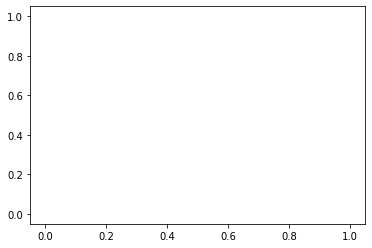

In [15]:
#Plots using matplotlib which is easier for a basic plot
from matplotlib import pyplot as plt

plt.plot(averaged_counts)
plt.savefig('function.png')

In [16]:
#Import classes for SVC : Support Vector Machines that serve as a standard classification algorithm with workflow tools
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV #Replaces from sklearn import grid_search

In [17]:
#Take in Parameters, use a dictionary to set the searchable parameters
#Use linear and rbf for kernel, C from 1-10, create grid search
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid = GridSearchCV(svr, parameters) #grid = grid_search.GridSearchCV(svr, parameters)

In [18]:
#Set up pipeline to take feature extraction step with CountVectorizer with function words and the grid search with SVM
pipeline1 = Pipeline([('feature_extraction', extractor),
                      ('clf', grid)
                     ])

In [19]:
#Get cross-validated store for pipeline
scores = cross_val_score(pipeline1, documents, classes, scoring='f1_macro')

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [20]:
#Print mean of scores
print(np.mean(scores))

NameError: name 'scores' is not defined

In [21]:
#Compile by reusing the grid search, specifying the new feature extractor in a new pipeline and produce the results
pipeline = Pipeline([('feature_extraction', CountVectorizer(analyzer='char', ngram_range=(3, 3))),
                     ('classifier', grid)
                    ])
scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print("Score: {:.3f}".format(np.mean(scores)))

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [22]:
#Enron energy company emails dataset , "enron_mail_20150507" is found directly inside "maildir" as extracted
enron_data_folder = os.path.join(os.path.expanduser("~"), "OneDrive", "Desktop", "Data Mining", "Chapter9HW", "Data", "maildir")

In [23]:
#Use Email Parser to take in only the content from the e-mails
#Want the emails that can be attributed to a particular author, check in sent folder
#Function chooses authors at random and return emails
from email.parser import Parser
p = Parser()

In [24]:
#Imports check random state
from sklearn.utils import check_random_state

In [25]:
#Limit search to authors with at least 10 emails using min_docs_author and max of 100 emails max_docs_parameter, num_authors -10 default for authors to get
#Loops through the authors, retrieve list of emails for author, store document and class info in lists, store mapping between author name and class value
def get_enron_corpus(num_authors=10, data_folder=enron_data_folder,
                     min_docs_author=10, max_docs_author=100,
                     random_state=None):
    random_state = check_random_state(random_state)
    email_addresses = sorted(os.listdir(data_folder))
    random_state.shuffle(email_addresses)
    documents = []
    classes = []
    author_num = 0
    authors = {}
    for user in email_addresses:
        users_email_folder = os.path.join(data_folder, user)
        mail_folders = [os.path.join(users_email_folder, subfolder)
                        for subfolder in os.listdir(users_email_folder)
                        if "sent" in subfolder]
        try:
            authored_emails = [open(os.path.join(mail_folder, email_filename), encoding='cp1252').read()
                               for mail_folder in mail_folders
                               for email_filename in os.listdir(mail_folder)]
        except IsADirectoryError:
            continue
        if len(authored_emails) < min_docs_author:
            continue
        if len(authored_emails) > max_docs_author:
            authored_emails = authored_emails[:max_docs_author]
        contents = [p.parsestr(email)._payload for email in authored_emails]
        documents.extend(contents)
        classes.extend([author_num] * len(authored_emails))
        authors[user] = author_num
        author_num += 1
        if author_num >= num_authors or author_num >= len(email_addresses):
            break
    return documents, np.array(classes), authors

In [26]:
#Get dataset by making function call with random state of 14
documents, classes, authors = get_enron_corpus(data_folder=enron_data_folder, random_state=14)

In [27]:
#Dist plot
sns.distplot?

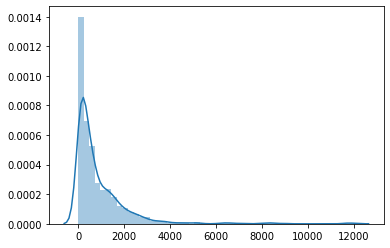

In [28]:
#Plot histogram of document lengths
document_lengths = [len(document) for document in documents]
sns.distplot(document_lengths)
plt.savefig("enron_dist.png")

In [29]:
#Gets length of documents and classes
len(documents), len(classes)

(953, 953)

In [30]:
#Extracts email 100
documents[100]

'Please review MEH presentation and send comments to MEH by 5:00 p.m.  May 12, \n1999 via notes mail.\n\nThank you,\n\nSylvia T. Sauseda/MEH'

In [31]:
#Computes scores and prints results
scores = cross_val_score(pipeline, documents, classes, scoring='f1_macro')
print("Score: {:.3f}".format(np.mean(scores)))

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unsc

Score: 0.558


In [32]:
#Creates training and testing subsets to use for confusion matrix, refit data
from sklearn.model_selection import train_test_split
training_documents, testing_documents, y_train, y_test = train_test_split(documents, classes, random_state=14)

In [33]:
#Fits the pipeline to our training documents and create predictions for testing set
pipeline.fit(training_documents, y_train)
y_pred = pipeline.predict(testing_documents)

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

In [34]:
#Extracts the best possible combination of parameters from grid search object/ classifier step
print(pipeline.named_steps['classifier'].best_params_)

{'C': 10, 'kernel': 'linear'}


In [35]:
#Creates confusion matrix using libraries, and get author names to label axis correctly, use Author's dictionary from Enron dataset
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm = cm / cm.astype(np.float).sum(axis=1)
sorted_authors = sorted(authors.keys(), key=lambda x:authors[x])

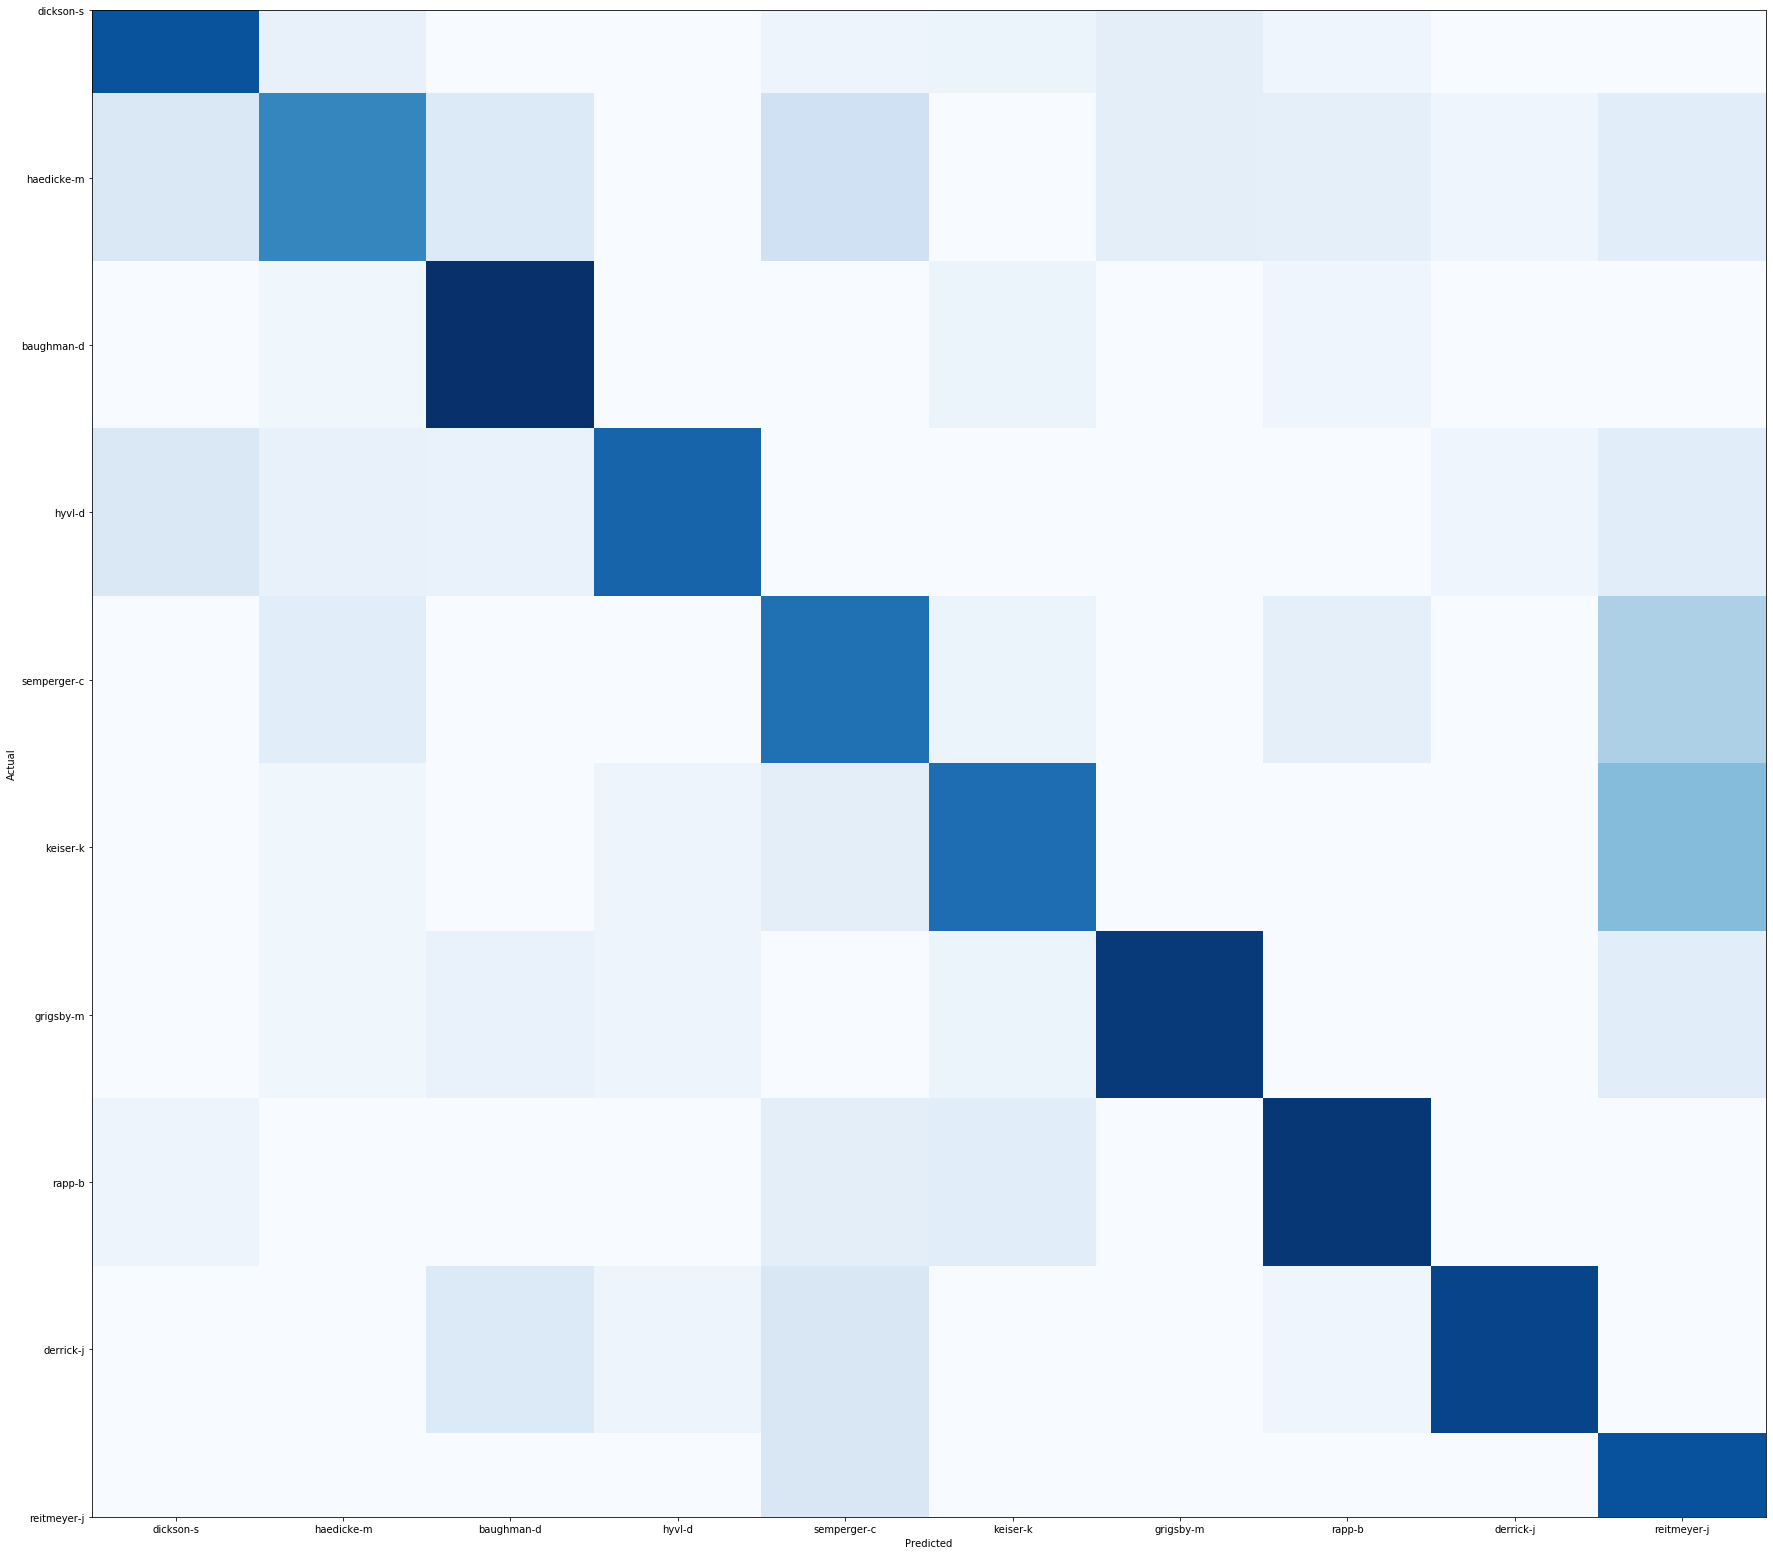

In [36]:
#Display the confusion matrix using matplotlib, letter labels replaced with authors from chapter
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(30, 30))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
tick_marks = np.arange(len( sorted_authors ))
plt.xticks(tick_marks, sorted_authors )
plt.yticks(tick_marks, sorted_authors )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()